# STABLA ODLUCIVANJA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from termcolor import colored
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.io import arff
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.model_selection import GridSearchCV


Ucitavanje podataka

In [2]:
data = pd.read_csv('/home/user/Desktop/IP/sredjeni_podaci.csv')
data.head()

,Unnamed: 0,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,0,21.0,27.0,6.0,2,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,0,0
1,1,1.0,0,21.0,22.0,1.0,0,1,3,0,...,0,1,7.0,5.0,1,1,1.0,1,0,0
2,2,1.0,0,21.0,22.0,1.0,0,1,1,1,...,0,1,7.0,5.0,1,0,1.0,1,1,1
3,3,1.0,0,21.0,23.0,2.0,1,1,3,0,...,0,1,7.0,6.0,1,1,0.0,1,1,1
4,4,1.0,0,21.0,24.0,3.0,1,1,4,0,...,0,1,6.0,6.0,1,1,0.0,1,1,1


Razdvanjamo ciljni atribut od ostalih atributa i podatke delimo na trening i test skup u odnosu 70-30%.

In [3]:
Y = data['match']
X = data.drop('match',axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, stratify=Y, random_state=42)              

Pomocna funkcija za proveru tacnosti modela i  iscrtavanje stabla.Kod preuzet iz materijala sa casova vezbi.

In [4]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['1', '0'], feature_names=feature_names, filled=True)
    plt.title("Stablo odlucivanja dubine{} sa {} cvorova".format(model.get_depth(), model.get_n_leaves()))
    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parametri modela {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

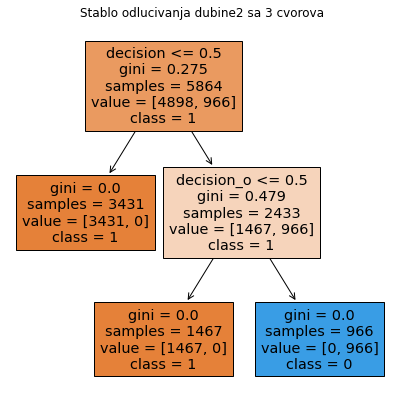

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [5]:
feature_names = X.columns
dt = DecisionTreeClassifier()

dt.fit(X_train, Y_train)
plot_decision_tree(dt, feature_names)

Proveravamo koliko koji atribut utice na formiranje stabla.

In [6]:

print(dt.feature_importances_)


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Zakljucujemo da se za klasifikaciju koriste samo 2 artibuta. Koriste se atributi 'decision' i 'decision_o'.

Proveravamo ponasanje modela na trening i test skupu.

In [7]:
report(dt,X_train,Y_train,text = "TRENING")
report(dt,X_test,Y_test,text = "TEST")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4898
           1       1.00      1.00      1.00       966

    accuracy                           1.00      5864
   macro avg       1.00      1.00      1.00      5864
weighted avg       1.00      1.00      1.00      5864

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad TRENING podacima 
---------------------------------------------------------------------------------
      1    0
1  4898    0
0     0  966
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad TEST podacima
---------------------------------------------------------------------------------
 

f1-score je 1 i na trening i na test skupu, pa zakljujemo da je model dobar.Nije se preprilagodio, zato sto, pogledom na matricu konfuzije, vidimo da model ne pravi greske ni na test skupu.

Videli smo da na formiranje stabla ucitu samo 2 atributa. Proveravamo kako bi izgledalo stablo i koju bi tacnost nas model imao ako bi izbacila ta 2 glavna atributa.

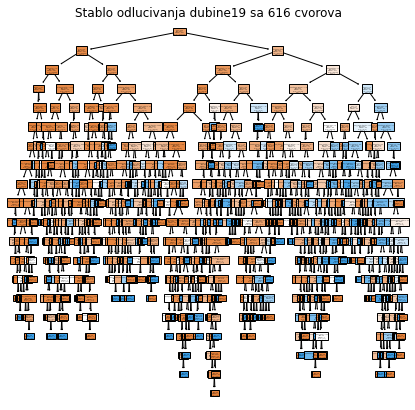

---------------------------------------------------------------------------------
Parametri modela DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [8]:
data1 = data.drop('decision',axis = 1);
data1.drop('decision_o',axis=1,inplace = True)
Y1 = data1['match'];
X1 = data1.drop('match',axis = 1)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size=0.25, stratify=Y1, random_state=12)
dt1 = DecisionTreeClassifier()
feature_names1 = X1.columns
dt1.fit(X_train1, Y_train1)
plot_decision_tree(dt1, feature_names1)

In [9]:
report(dt1, X_train1, Y_train1,text = "TRENING")
report(dt1, X_test1, Y_test1,text = "TEST")

Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5248
           1       1.00      1.00      1.00      1035

    accuracy                           1.00      6283
   macro avg       1.00      1.00      1.00      6283
weighted avg       1.00      1.00      1.00      6283

---------------------------------------------------------------------------------
Matrica konfuzije za model DecisionTreeClassifier nad TRENING podacima 
---------------------------------------------------------------------------------
      1     0
1  5248     0
0     0  1035
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelDecisionTreeClassifier nad TEST podacima
--------------------------------------------------------------------------------

Proverom matrice konfuzije, primecujem da se ovaj model preprilagodio, zato sto je verovatno isao do cistih cvorova i time se u potpunosti prilagodio test podacima i izgubio moc generalizacije.
U ovom modelu, skoro svi atributi imaju uticaj na donosenje odluke.

In [10]:
print(dt1.feature_importances_)


[0.02594559 0.0057511  0.00120554 0.01406422 0.0094396  0.01990066
 0.00057837 0.00199314 0.00980874 0.00275412 0.00768983 0.00749244
 0.00110235 0.         0.03129668 0.01660492 0.01757631 0.0170331
 0.01656574 0.01893886 0.01852418 0.0016387  0.00201872 0.00712026
 0.         0.00107838 0.00050855 0.08697292 0.00483668 0.00998846
 0.0331354  0.00832815 0.00498751 0.0031041  0.00329794 0.00418771
 0.00397785 0.00413306 0.02009686 0.         0.01358171 0.0126105
 0.01417254 0.00866181 0.00579887 0.         0.0017351  0.
 0.00195755 0.         0.00202428 0.00615842 0.00355502 0.00416094
 0.00115673 0.0079641  0.00092798 0.00110415 0.         0.00567474
 0.0053184  0.03175723 0.00976924 0.01049709 0.0109306  0.01098449
 0.01497996 0.00058514 0.00092539 0.00287771 0.00379587 0.00079446
 0.00577062 0.00455831 0.01222093 0.01184158 0.00854784 0.00863496
 0.00863885 0.00593332 0.00712524 0.00769539 0.00273117 0.00527644
 0.0111041  0.00255006 0.00906519 0.00353183 0.00366265 0.00829656
 0.00

U nastavku cu primeniti klasifikaciju koriscenjem slucajne sume, ali cu koristiti sve atribute.
Primenjujem grid_search algoritam  za pronalazenje parametara modela.

 # RandomForestClassifier

In [11]:
param_grid_rfc = {
    'n_estimators': [100, 200, 300,400],  # Broj stabala u slučajnoj šumi
    'max_depth': [5, 10,15],  # Maksimalna dubina stabala
    'min_samples_split': [2, 5, 10],  # Minimalni broj uzoraka za razdvajanje čvora
}

estimator2 = GridSearchCV(RandomForestClassifier(),
             param_grid=param_grid_rfc,
             cv=4,verbose = 5)

estimator2.fit(X_train,Y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.937 total time=   1.6s
[CV 2/4] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.905 total time=   1.6s
[CV 3/4] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.932 total time=   1.4s
[CV 4/4] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.905 total time=   1.4s
[CV 1/4] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.919 total time=   2.8s
[CV 2/4] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.920 total time=   2.8s
[CV 3/4] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.920 total time=   3.1s
[CV 4/4] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.892 total time=   2.8s
[CV 1/4] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.915 total time=   4.4s
[CV 2/4] END max_depth=5, min_samples_split=2, n_estimators=300;,

[CV 1/4] END max_depth=10, min_samples_split=10, n_estimators=200;, score=0.983 total time=   4.4s
[CV 2/4] END max_depth=10, min_samples_split=10, n_estimators=200;, score=0.982 total time=   4.5s
[CV 3/4] END max_depth=10, min_samples_split=10, n_estimators=200;, score=0.982 total time=   4.2s
[CV 4/4] END max_depth=10, min_samples_split=10, n_estimators=200;, score=0.984 total time=   4.4s
[CV 1/4] END max_depth=10, min_samples_split=10, n_estimators=300;, score=0.979 total time=   6.3s
[CV 2/4] END max_depth=10, min_samples_split=10, n_estimators=300;, score=0.983 total time=   6.5s
[CV 3/4] END max_depth=10, min_samples_split=10, n_estimators=300;, score=0.986 total time=   6.6s
[CV 4/4] END max_depth=10, min_samples_split=10, n_estimators=300;, score=0.981 total time=   6.6s
[CV 1/4] END max_depth=10, min_samples_split=10, n_estimators=400;, score=0.986 total time=   8.8s
[CV 2/4] END max_depth=10, min_samples_split=10, n_estimators=400;, score=0.983 total time=   8.6s
[CV 3/4] E

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=5)

In [12]:
print(estimator2.best_score_)
print(estimator2.best_params_)


0.9921555252387448
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


In [17]:
report(estimator2.best_estimator_, X_train, Y_train,text = "TRENING")
report(estimator2.best_estimator_, X_test, Y_test,text = "TEST")

Izvestaj o klasifikaciji za modelRandomForestClassifier nad TRENING podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4898
           1       1.00      1.00      1.00       966

    accuracy                           1.00      5864
   macro avg       1.00      1.00      1.00      5864
weighted avg       1.00      1.00      1.00      5864

---------------------------------------------------------------------------------
Matrica konfuzije za model RandomForestClassifier nad TRENING podacima 
---------------------------------------------------------------------------------
      1    0
1  4898    0
0     0  966
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelRandomForestClassifier nad TEST podacima
---------------------------------------------------------------------------------
 

# Poredjenje modela

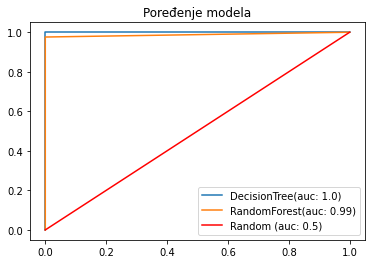

In [15]:
#Poredim modele koi koriste sve adribute sa random modelom
from sklearn.metrics import roc_curve, roc_auc_score
models = [dt, estimator2.best_estimator_]
model_names = ['DecisionTree', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Poredim model koji ne sadrzi atribute "decision" i "decision_o" sa random modelom.

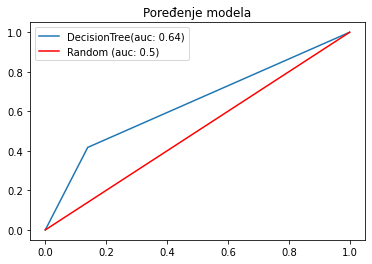

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dt1]
model_names = ['DecisionTree']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test1)
    fpr,tpr, _ = roc_curve(Y_test1, y_pred)
    auc = roc_auc_score(Y_test1, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()